## Import The Needed Libraries


In [426]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold

import joblib

import warnings
warnings.filterwarnings('ignore')



## Import Our Dataset

In [449]:
data = pd.read_csv("D:\cellula/first inten project.csv")

In [450]:
data.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


## Show some information about the dataset

In [451]:
# Columns names
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [452]:
# Check for unique values
data.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

In [453]:
# Feature information
data.info() #No nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [454]:
# Statistical information
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [455]:
# Number of the rows and cols 
data.shape

(36285, 17)

In [456]:
# The number of rows times number of columns
data.size

616845

# 1. Data Preprocessing

## Data Cleaning

### Checking For Nulls

In [457]:
data.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

- There is no nulls

### Checking For Duplicates

In [458]:
data.duplicated().sum()

0

- No duplicates

### Removing Unwanted coloumns

In [459]:
data.drop(['Booking_ID'], axis=1, inplace=True)

- We do not need Booking ID in our prediction.

### Data Types

In [460]:
data.dtypes

number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

- So, we can simplify some data types

### Binarizing the target column

In [461]:
# For booking status
data = data.replace({'Not_Canceled': 0 , 'Canceled': 1})

### Split date of reservation into year, month and day

In [462]:
# Splitting Date into day, month and year separate columns
data[["day", "month", "year"]] = pd.DataFrame(
    data["date of reservation"]
    .apply(
        lambda x: re.split("/|-", x),
    )
    .to_list(),
)

In [463]:
#Transform from object to int
data["day"] = data["day"].astype(int)
data["month"] = data["month"].astype(int)
data["year"] = data["year"].astype(int)

In [464]:
#Drop date of reservation from dataset because we do not need it anymore
data.drop("date of reservation", axis=1, inplace=True)

In [465]:
# Transform average price from float to int data type
data["average price "] = data["average price "].round().astype(int)

In [466]:
data.head(10)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,day,month,year
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88,0,0,10,2,2015
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,107,1,0,11,6,2018
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50,0,1,2,28,2018
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100,1,1,5,20,2017
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77,0,1,4,11,2018
5,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100,1,1,9,13,2016
6,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,108,1,0,10,15,2017
7,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,106,1,0,12,26,2018
8,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,97,1,0,7,6,2018
9,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133,3,0,10,18,2018


###  Add column for the total number of individuals in each reservation

In [467]:
data['no of individuals'] = data['number of adults'] + data['number of children']

# 3. Checking and Handling Outliers 

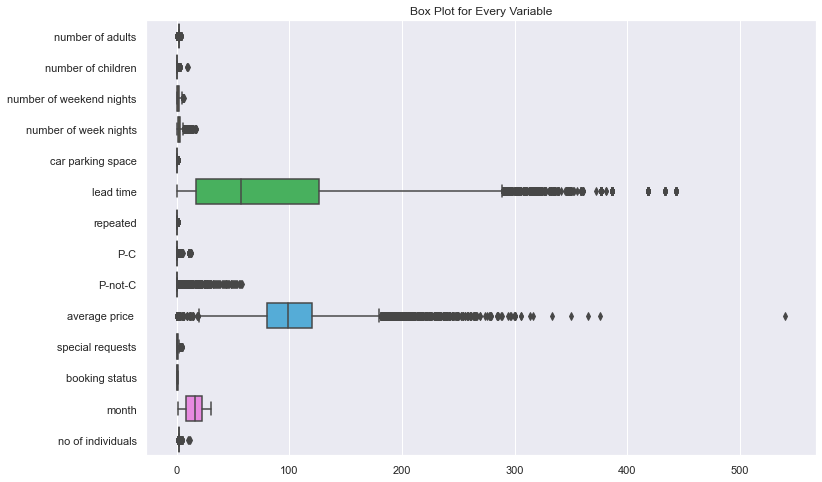

In [468]:
# Create box plots for every variable before dropping outliers
data_box = data.drop(["year", "day"], axis=1) # Visualize boxplot except some cols
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=data_box, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()


- so, there are outliers in lead time and average price cols that will affect the prediction. 

## Handling Outliers Using IQR

In [469]:
# Removing outliers by Inter Quantile Range method

# For lead time
for z in ['lead time']:
    Q75,Q25 = np.percentile(data.loc[:,z],[75,25])
    intr_qr = Q75-Q25
 
    max = Q75+(1.5*intr_qr)
    min = Q25-(1.5*intr_qr)
 
    data.loc[data[z] < min,z] = np.nan
    data.loc[data[z] > max,z] = np.nan

In [470]:
# For average price
for z in ['average price ']:
    Q75,Q25 = np.percentile(data.loc[:,z],[75,25])
    intr_qr = Q75-Q25
 
    max = Q75+(1.5*intr_qr)
    min = Q25-(1.5*intr_qr)
 
    data.loc[data[z] < min,z] = np.nan
    data.loc[data[z] > max,z] = np.nan

In [471]:
data.isnull().sum() #Check for nulls 

number of adults               0
number of children             0
number of weekend nights       0
number of week nights          0
type of meal                   0
car parking space              0
room type                      0
lead time                   1332
market segment type            0
repeated                       0
P-C                            0
P-not-C                        0
average price               1664
special requests               0
booking status                 0
day                            0
month                          0
year                           0
no of individuals              0
dtype: int64

In [472]:
data = data.dropna(axis = 0) # Drop nulls 
data.isnull().sum() # Sum all nuls

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
booking status              0
day                         0
month                       0
year                        0
no of individuals           0
dtype: int64

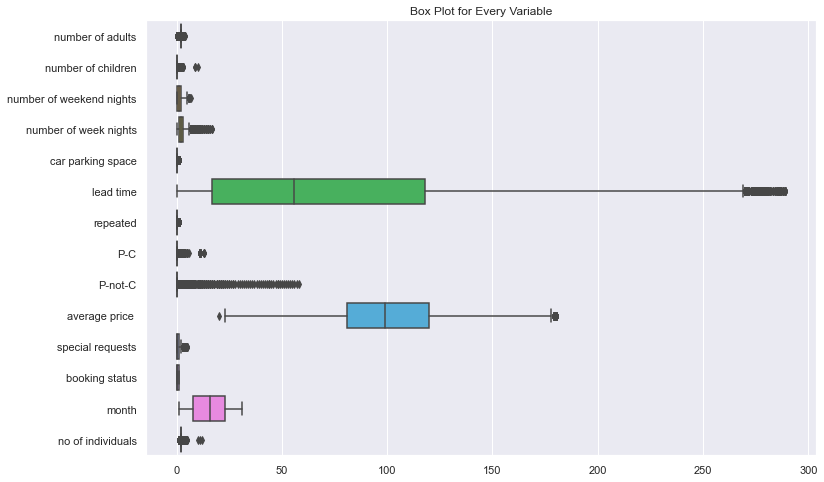

In [473]:
# Create box plots for every variable after dropping outliers
data_box = data.drop(["year", "day"], axis=1)
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=data_box, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()

- Here we have removed the outliers.

In [474]:
data.shape 

(33299, 19)

- Rows have reduced as we removed outliers

# 3. Transformation For The Categorical Variables

In [475]:
cat_features = ['type of meal', 'room type', 'market segment type']
lab = LabelEncoder()
for col in cat_features:
    data[col] = lab.fit_transform(data[col])


### Checking for data types after formatting

In [476]:
data.dtypes

number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                  int32
car parking space             int64
room type                     int32
lead time                   float64
market segment type           int32
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
booking status                int64
day                           int32
month                         int32
year                          int32
no of individuals             int64
dtype: object

In [477]:
data.head(10)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,day,month,year,no of individuals
0,1,1,2,5,0,0,0,224.0,3,0,0,0,88.0,0,0,10,2,2015,2
1,1,0,1,3,2,0,0,5.0,4,0,0,0,107.0,1,0,11,6,2018,1
2,2,1,1,3,0,0,0,1.0,4,0,0,0,50.0,0,1,2,28,2018,3
3,1,0,0,2,0,0,0,211.0,4,0,0,0,100.0,1,1,5,20,2017,1
4,1,0,1,2,2,0,0,48.0,4,0,0,0,77.0,0,1,4,11,2018,1
6,1,1,1,4,0,0,0,34.0,4,0,0,0,108.0,1,0,10,15,2017,2
7,3,0,1,3,0,0,3,83.0,4,0,0,0,106.0,1,0,12,26,2018,3
8,1,1,0,4,0,0,0,121.0,3,0,0,0,97.0,1,0,7,6,2018,2
9,2,0,0,5,0,0,3,44.0,4,0,0,0,133.0,3,0,10,18,2018,2
10,1,0,1,0,2,0,0,0.0,4,0,0,0,85.0,0,0,9,11,2018,1


# 4. Feature Engineering

## Feature Selection

## 1) Using SelectKBest 

In [482]:
# Split dataset into features and target
Features = data.drop(["booking status"], axis=1)
Target = data["booking status"]

In [408]:
# SelectKBest for feature selection

k_best = SelectKBest(score_func=f_classif, k=10) # Use f_classif as score function and put k =10

X = k_best.fit_transform(Features, Target) # Fitting (learn from data) and transforming the data 
y = Target

Selected_features_indices = k_best.get_support(indices=True) # Get the indices of the selected features
Feature_scores = k_best.scores_  # Get the scores associated with each feature

Feature_info = list(zip(Features.columns, Feature_scores)) # Create a list of tuples containing feature names and scores

# Sort the feature info in descending order based on scores
Sorted_feature_info = sorted(Feature_info, key=lambda x: x[1], reverse=True) 

for Feature_name, Feature_score in Sorted_feature_info[:10]:
    print(f"{Feature_name}: {Feature_score:.2f}")

lead time: 6752.83
special requests: 2126.71
market segment type: 718.96
average price : 621.22
repeated: 342.72
number of week nights: 248.66
car parking space: 216.83
no of individuals: 194.14
number of adults: 169.22
number of weekend nights: 168.46


- This method is used to select the top k features based on a given scoring function.
- Use ' f_classif ' as score function beause we have a classification problem.
- It computes ANOVA F-value between feature and target.

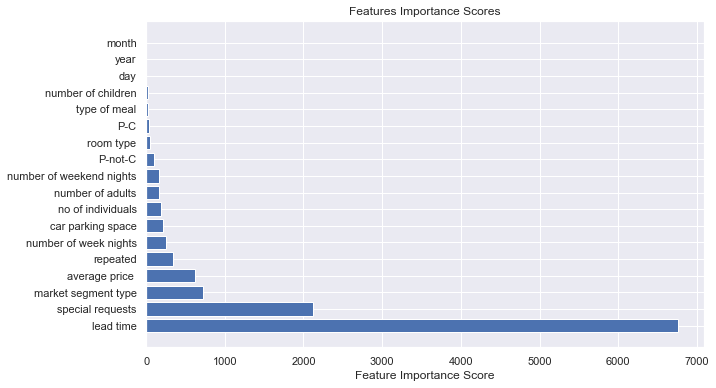

In [409]:
# Visualize the relationship between features with their score and the target variable
Feature_names, Feature_scores = zip(*Sorted_feature_info[:])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(Feature_names, Feature_scores)
plt.xlabel("Feature Importance Score")
plt.title("Features Importance Scores")
plt.show()

# 5. Split Data into Train & Test

In [487]:
# Splitting data into 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    Features, Target, test_size=0.3, random_state=5
)

# 6. Modeling And Accuracy Calculation

In [488]:
# To store accuracy of models
scores = {}

## A) Logistic Regression

- Logistic regression is used for binary classification.
- Hyperparameter tuning: is the process of finding the optimal values for the hyperparameters of a machine-learning model.
- grid search method with cross-validation helps you tune the hyperparameters of machine-learning models to find the best model configuration for logistic regression.


In [412]:
log_reg = LogisticRegression() #  From the scikit-learn library

params = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l1", "l2"]} # The hyperparameters to be tuned 

# Tune the hyperparameters of the model using grid search
grid_search = GridSearchCV(log_reg, param_grid=params, cv=5) # Means 5-fold cross-validation will be used

grid_search.fit(X_train, y_train) # Fit the model to the training data

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}") # Cross-validation score

best_log_reg = grid_search.best_estimator_ # Our model with the best parameters
y_pred = best_log_reg.predict(X_test) # Make prediction on the test data

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["Logistic Regression"] = accuracy_score(y_test, y_pred)

Best Parameters: {'C': 100, 'penalty': 'l2'}
Best Score: 0.7860055016244675
Accuracy: 0.79


Hyperparameters:
- C is the inverse of regularization strength; smaller values specify stronger regularization.
- penalty specifies the norm used in the penalization (l1 for LASSO and l2 for Ridge).

<AxesSubplot:>

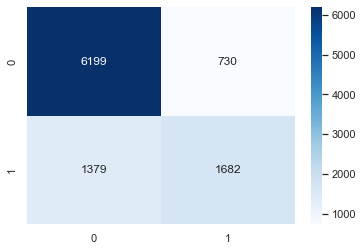

In [413]:
# Visualizing confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")

In [414]:
# Show classification report of the model
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      6929
           1       0.70      0.55      0.61      3061

    accuracy                           0.79      9990
   macro avg       0.76      0.72      0.73      9990
weighted avg       0.78      0.79      0.78      9990



## B) K-Nearest Neighbor (KNN)

- KNN is one of the most basic essential classification algorithms in machine learning that helps us identify the nearest points.
- The value of k represents the number of nearest neighbors that needs to be considered while making prediction.
- To measure the similarity between target and training data points, distance is calculated between each of the data points in the dataset and target point.

In [415]:
knn = KNeighborsClassifier() #  From the scikit-learn library

params = {"n_neighbors": np.arange(1, 10)}  # The hyperparameter to be tuned

# Grid search with cross-validation for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid=params, cv=5) 

grid_search.fit(X_train, y_train) # Fit the model to the training data

print(f"Best Parameters: {grid_search.best_params_}") 
print(f"Best Score: {grid_search.best_score_}") # Cross-validation score

best_knn = grid_search.best_estimator_ # Our model with the best parameters
y_pred = best_knn.predict(X_test)  # Make prediction on the test data

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
scores["KNN"] = accuracy_score(y_test, y_pred)

Best Parameters: {'n_neighbors': 2}
Best Score: 0.8142348987661151
Accuracy: 0.82


Hyperparameters:
- n_neighbors specifies the number of neighbors to consider for classification. The range is from 1 to 9.

<AxesSubplot:>

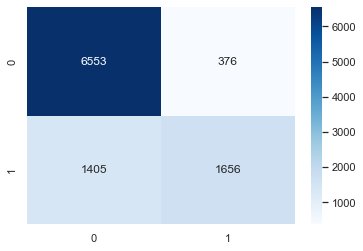

In [416]:
# Visualizing confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")

In [417]:
# Show classification report of the model
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      6929
           1       0.81      0.54      0.65      3061

    accuracy                           0.82      9990
   macro avg       0.82      0.74      0.77      9990
weighted avg       0.82      0.82      0.81      9990



## C) Random Forest

- Random Forest algorithm is a powerful tree learning technique in Machine Learning. It works by creating a number of Decision Trees during the training phase.
- In prediction, the algorithm aggregates the results of all trees by voting (for classification tasks).

In [486]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier object
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with the RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator found by GridSearchCV
best_rf = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")

# Store the accuracy in a dictionary
scores["Random Forest"] = accuracy

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.90


Hyperparameters:
- max_depth=20: The maximum depth of each tree in the forest.
- n_estimators=100: The number of trees in the forest.
- min_samples_split=2: The minimum number of samples required to split an internal node.
- min_samples_leaf=1: The minimum number of samples required to be at a leaf node.
- bootstrap=True: bootstrap samples are used when building trees.

In [242]:
print(rf.score(X_train,y_train))

0.9653781801021065


<AxesSubplot:>

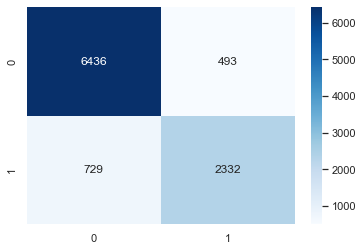

In [243]:
# Visualizing confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt=".0f")

In [244]:
# Show classification report of the model
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      6929
           1       0.83      0.76      0.79      3061

    accuracy                           0.88      9990
   macro avg       0.86      0.85      0.85      9990
weighted avg       0.88      0.88      0.88      9990



## Models Comparison

In [245]:
# Compare models based on accuracy
for model, score in scores.items():
    print(f"{model}: {score:.4f}")

Logistic Regression: 0.7889
KNN: 0.8217
Random Forest: 0.8777


- As conclusion, the best model for predicting booking status classification is Random Forest with accuracy 0.86.

## 2) Wrapper Method (Forward Selection)

In [489]:
X = np.array(X_train)
y = np.array(y_train)

# Initialize an empty list to store selected feature indices
selected_features = []

# Define the machine learning model (in this case, a Random Forest Classifier)
model = best_rf

# Define the number of features you want to select
num_features_to_select = 13

while len(selected_features) < num_features_to_select:
    best_score = -1
    best_feature = None

    for feature_idx in range(X.shape[1]):
        if feature_idx in selected_features:
            continue

        # Try adding the feature to the selected set
        candidate_features = selected_features + [feature_idx]

        # Evaluate the model's performance using cross-validation
        scores = cross_val_score(model, X[:, candidate_features], y, cv=5, scoring='accuracy')
        mean_score = np.mean(scores)

        # Keep track of the best-performing feature
        if mean_score > best_score:
            best_score = mean_score
            best_feature = feature_idx

    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Selected Feature {len(selected_features)}: {best_feature}, Mean Accuracy: {best_score:.4f}")

print("Selected feature indices:", selected_features)

Selected Feature 1: 7, Mean Accuracy: 0.7627
Selected Feature 2: 12, Mean Accuracy: 0.7856
Selected Feature 3: 13, Mean Accuracy: 0.8368
Selected Feature 4: 14, Mean Accuracy: 0.8592
Selected Feature 5: 8, Mean Accuracy: 0.8710
Selected Feature 6: 15, Mean Accuracy: 0.8828
Selected Feature 7: 2, Mean Accuracy: 0.8862
Selected Feature 8: 5, Mean Accuracy: 0.8898
Selected Feature 9: 6, Mean Accuracy: 0.8910
Selected Feature 10: 3, Mean Accuracy: 0.8923
Selected Feature 11: 9, Mean Accuracy: 0.8934
Selected Feature 12: 4, Mean Accuracy: 0.8930
Selected Feature 13: 11, Mean Accuracy: 0.8929
Selected feature indices: [7, 12, 13, 14, 8, 15, 2, 5, 6, 3, 9, 4, 11]


In [376]:
# The selected features
feature_names = Features.columns
selected_feature_names = [feature_names[i] for i in selected_features]
print("Selected feature names:", selected_feature_names)

Selected feature names: ['lead time', 'average price ', 'special requests', 'day', 'month', 'market segment type', 'number of weekend nights', 'number of week nights', 'car parking space', 'room type', 'P-not-C', 'year', 'no of individuals']


## 3) Vriance Threshold

In [442]:
# Split dataset into features and target
Features = data.drop(["booking status"], axis=1)
Target = data["booking status"]

In [443]:
# Define the VarianceThreshold object with a threshold
threshold = 0.4 # This threshold will remove only features with zero variance
vt = VarianceThreshold(threshold)

# Fit the VarianceThreshold model and transform the data
vt.fit(Features)
transformed_data = vt.transform(Features)

# Get the names of the features that are kept
features_kept = Features.columns[vt.get_support()]
print(f'Features kept: {features_kept.tolist()}')


Features kept: ['number of weekend nights', 'number of week nights', 'type of meal', 'room type', 'lead time', 'market segment type', 'P-not-C', 'average price ', 'special requests', 'day', 'month', 'year']


In [444]:
len(features_kept)

12

In [445]:
# Convert transformed_data back to a DataFrame if needed
transformed_df = pd.DataFrame(transformed_data, columns=features_kept)

# Define your target variable
y = np.array(Target)

# Proceed with your model and feature selection code using transformed_df instead of Features
X = np.array(transformed_df)

In [423]:
# Splitting data into 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=5
)

In [446]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier object
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with the RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator found by GridSearchCV
best_rf = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
y_pred = best_rf.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.90


- Best accuracy

# Extract The Model Using Joblib

## For Random Forest

In [438]:
# Save the model
joblib.dump(best_rf, 'RandomForest')

['RandomForest']

In [441]:
# Load the model
loaded_model = joblib.load('RandomForest')
loaded_model

RandomForestClassifier(bootstrap=False, min_samples_split=5, random_state=42)

In [ ]:
# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)
predictions

In [440]:
result=loaded_model.score(X_test, y_test)
result

0.8967967967967968